# U.S. Wine Market Analysis

Looking at whether U.S. wine sales have been declining using federal data from TTB.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [14]:
df = pd.read_csv('wine_monthly.csv')
df.head()

,CY_Month_Number,Year,Statistical_Group,Statistical_Category,Statistical_Detail,Count_IMs,Value,commodity,Stat_Redaction
0,1,2012,1-Production,0-Category Total,1-Production,775.0,38830836.0,Wine,False
1,1,2012,2-Withdrawals,0-Category Total,2-Taxable Withdrawals,1141.0,42444611.0,Wine,False
2,1,2012,2-Withdrawals,0-Category Total,2-Taxable Withdrawals by Bulk vs Bottled,1141.0,42444611.0,Wine,False
3,1,2012,2-Withdrawals,0-Category Total,3-Tax Free Withdrawals,612.0,9288892.0,Wine,False
4,1,2012,2-Withdrawals,0-Category Total,3-Tax Free Withdrawals For Export,134.0,8554736.0,Wine,False


In [15]:
# how many rows?
len(df)

5644

In [16]:
# what years does this cover?
print(df['Year'].min())
print(df['Year'].max())

2012
2025


In [17]:
# what categories are in this data?
df['Statistical_Category'].unique()

array(['0-Category Total', '01-Count of IMs', '1-Production',
       '2-Taxable Withdrawals',
       '2-Taxable Withdrawals by Bulk vs Bottled',
       '3-Tax Free Withdrawals', '3-Tax Free Withdrawals For Export',
       '4-Stocks on Hand End-of-Period',
       '4-Stocks on Hand End-of-Period by Bulk vs Bottled'], dtype=object)

## Filter to taxable withdrawals

Taxable withdrawals = wine leaving the winery to be sold. This is the closest thing to "sales" in this data.

In [18]:
withdrawals = df[df['Statistical_Category'] == '2-Taxable Withdrawals']
len(withdrawals)

830

In [19]:
# what wine types are tracked?
withdrawals['Statistical_Detail'].unique()

array(['1-Low Alcohol %', '2-Medium and High Alcohol %',
       '4-Artificially Carbonated Wine', '5-Sparkling Wine',
       '6-Hard Cider'], dtype=object)

## Find monthly totals

Add up all the wine types to get one number per month.

In [20]:
monthly = withdrawals.groupby(['Year', 'CY_Month_Number'])['Value'].sum()
monthly = monthly.reset_index()
monthly.columns = ['Year', 'Month', 'Total']
monthly.tail(20)

,Year,Month,Total
146,2024,3,52831097.0
147,2024,4,45781573.0
148,2024,5,47128997.0
149,2024,6,52866840.0
150,2024,7,42791437.0
151,2024,8,47786379.0
152,2024,9,53827501.0
153,2024,10,50252916.0
154,2024,11,44517627.0
155,2024,12,60443622.0


## Calculate year-over-year change

Compare each month to the same month last year. If the number is negative, wine volume went down.

In [21]:
# sort by year and month
monthly = monthly.sort_values(['Year', 'Month'])

# get last year's value for each month
monthly['Last_Year'] = monthly.groupby('Month')['Total'].shift(1)

# calculate percent change
monthly['Change'] = (monthly['Total'] - monthly['Last_Year']) / monthly['Last_Year'] * 100
monthly['Change'] = monthly['Change'].round(1)

monthly.tail(20)

,Year,Month,Total,Last_Year,Change
146,2024,3,52831097.0,61444451.0,-14.0
147,2024,4,45781573.0,46690856.0,-1.9
148,2024,5,47128997.0,46761274.0,0.8
149,2024,6,52866840.0,58862045.0,-10.2
150,2024,7,42791437.0,45089457.0,-5.1
151,2024,8,47786379.0,50703958.0,-5.8
152,2024,9,53827501.0,55448725.0,-2.9
153,2024,10,50252916.0,51264019.0,-2.0
154,2024,11,44517627.0,52569675.0,-15.3
155,2024,12,60443622.0,62980771.0,-4.0


## How many months have been down?

In [22]:
# just look at 2021 onwards
recent = monthly[monthly['Year'] >= 2021].copy()
recent

,Year,Month,Total,Last_Year,Change
108,2021,1,50218019.0,56818272.0,-11.6
109,2021,2,51779128.0,54790940.0,-5.5
110,2021,3,70349948.0,64377548.0,9.3
111,2021,4,58054085.0,56170884.0,3.4
112,2021,5,57614448.0,57754842.0,-0.2
113,2021,6,67990846.0,70293165.0,-3.3
114,2021,7,55371346.0,58873205.0,-5.9
115,2021,8,57308391.0,58852926.0,-2.6
116,2021,9,62704797.0,67866351.0,-7.6
117,2021,10,55015763.0,64598177.0,-14.8


In [23]:
# count how many months were negative
down_months = recent[recent['Change'] < 0]
print(f"Months with decline: {len(down_months)}")
print(f"Total months: {len(recent)}")

Months with decline: 53
Total months: 58


In [24]:
# what percent is that?
pct = len(down_months) / len(recent) * 100
print(f"{pct:.0f}% of months since 2021 have seen year-over-year decline")

91% of months since 2021 have seen year-over-year decline


## Try to find patterns

In [25]:
# mark each month as up or down
recent['Direction'] = 'DOWN'
recent.loc[recent['Change'] > 0, 'Direction'] = 'UP'
recent[['Year', 'Month', 'Change', 'Direction']]

,Year,Month,Change,Direction
108,2021,1,-11.6,DOWN
109,2021,2,-5.5,DOWN
110,2021,3,9.3,UP
111,2021,4,3.4,UP
112,2021,5,-0.2,DOWN
113,2021,6,-3.3,DOWN
114,2021,7,-5.9,DOWN
115,2021,8,-2.6,DOWN
116,2021,9,-7.6,DOWN
117,2021,10,-14.8,DOWN


## Finding trends in charts, as Dhrumil told us we need to make multiple charts before we can make a final one

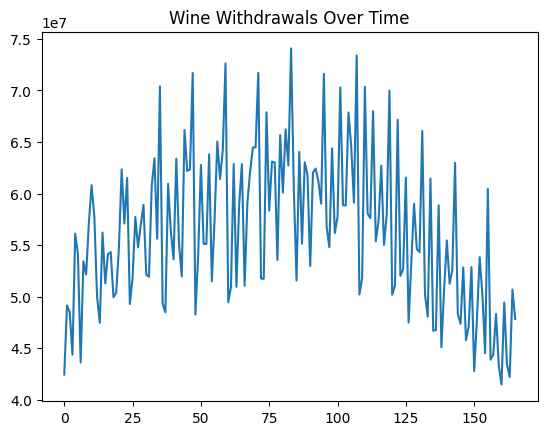

In [26]:
# simple line chart of totals over time
plt.plot(monthly['Total'])
plt.title('Wine Withdrawals Over Time')
plt.show()

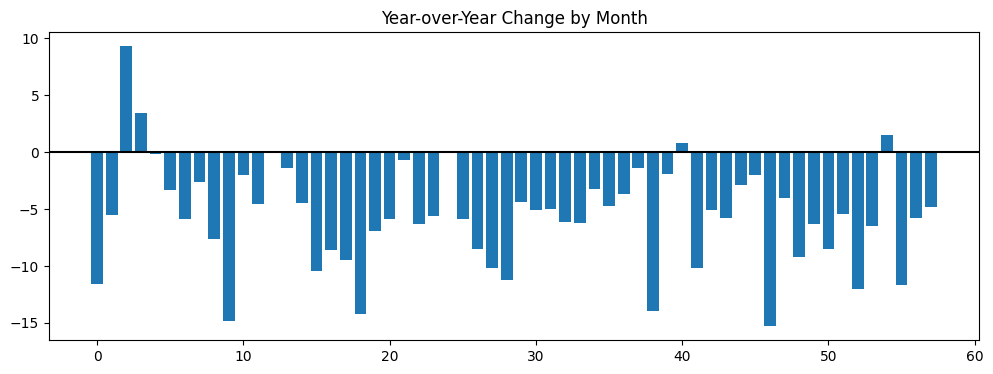

In [27]:
# try a bar chart of the year over year change
plt.figure(figsize=(12,4))
plt.bar(range(len(recent)), recent['Change'])
plt.axhline(y=0, color='black')
plt.title('Year-over-Year Change by Month')
plt.show()

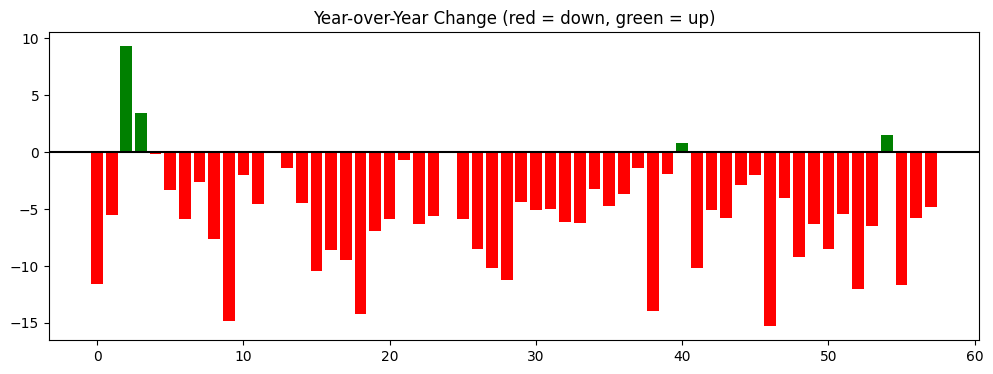

In [28]:
# color the bars red if negative, green if positive
colors = ['red' if x < 0 else 'green' for x in recent['Change']]

plt.figure(figsize=(12,4))
plt.bar(range(len(recent)), recent['Change'], color=colors)
plt.axhline(y=0, color='black')
plt.title('Year-over-Year Change (red = down, green = up)')
plt.show()

In [29]:
# yearly totals might be cleaner
yearly = monthly.groupby('Year')['Total'].sum()
yearly

Year
2012    619667408.0
2013    649424834.0
2014    683744603.0
2015    701484677.0
2016    711336461.0
2017    708878042.0
2018    738167364.0
2019    725239490.0
2020    742913545.0
2021    714359415.0
2022    669551859.0
2023    630070736.0
2024    593931775.0
2025    455020911.0
Name: Total, dtype: float64

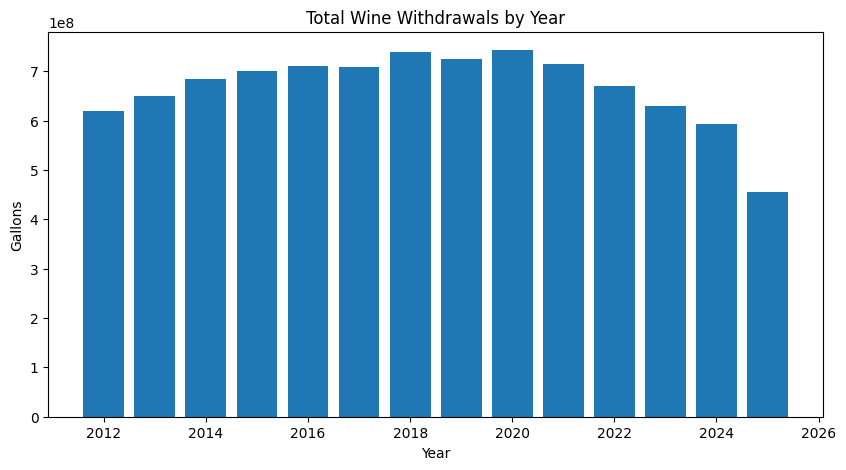

In [30]:
# bar chart of yearly totals
plt.figure(figsize=(10,5))
plt.bar(yearly.index, yearly.values)
plt.title('Total Wine Withdrawals by Year')
plt.xlabel('Year')
plt.ylabel('Gallons')
plt.show()

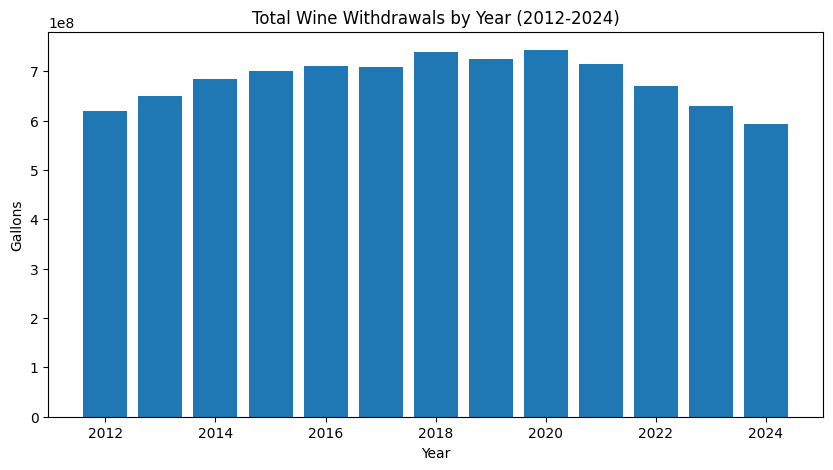

In [31]:
# 2025 is incomplete so remove it
yearly_complete = yearly[yearly.index < 2025]

plt.figure(figsize=(10,5))
plt.bar(yearly_complete.index, yearly_complete.values)
plt.title('Total Wine Withdrawals by Year (2012-2024)')
plt.xlabel('Year')
plt.ylabel('Gallons')
plt.show()